In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
train_directory='/content/drive/MyDrive/Colab Notebooks/train'
test_directory='/content/drive/MyDrive/test'
val_directory='/content/drive/MyDrive/valid'

In [7]:

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False

In [8]:

folders = 3


In [10]:

x = Flatten()(vgg.output)

prediction = Dense(folders, activation='softmax')(x)

In [11]:

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 3,
                                            class_mode = 'categorical')

Found 21 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


In [14]:
print(len(training_set))
print(len(test_set))

7
3


In [15]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/3
7/7 [==============================] - 28s 4s/step - loss: 2.2725 - accuracy: 0.3810 - val_loss: 2.3865 - val_accuracy: 0.4444
Epoch 2/3
7/7 [==============================] - 18s 3s/step - loss: 1.4094 - accuracy: 0.5714 - val_loss: 1.5128 - val_accuracy: 0.5556
Epoch 3/3
7/7 [==============================] - 22s 3s/step - loss: 1.4098 - accuracy: 0.6667 - val_loss: 1.4328 - val_accuracy: 0.5556


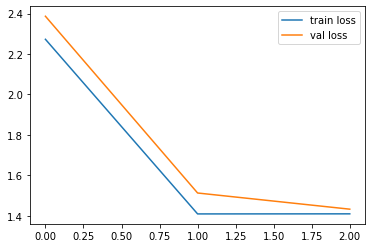

In [16]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

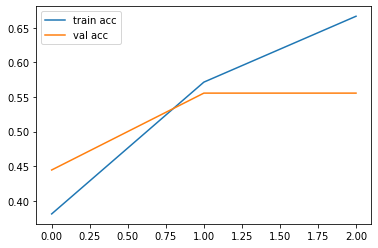

In [17]:

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [29]:
model.save('BC.h5')

In [30]:
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

model1 = load_model('./BC.h5',compile=False)  

In [22]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [23]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 1s 1s/step


'MaselaKarela'

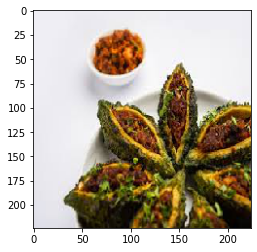

In [25]:
img='/content/drive/MyDrive/valid/MasalaKarela/4.jpg'
pic=load_img('/content/drive/MyDrive/valid/MasalaKarela/4.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 2s 2s/step


'MaselaKarela'

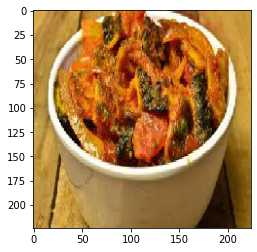

In [26]:
img='/content/drive/MyDrive/valid/MasalaKarela/2.jpg'
pic=load_img('/content/drive/MyDrive/valid/MasalaKarela/2.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [28]:
lab=training_set.class_indices
lab={k:v for v,k in lab.items()}
print(lab)

{0: 'CauliflowerLeavesChutney', 1: 'GonguraChickenCurry', 2: 'MaselaKarela'}
